In [2]:
%config Completer.use_jedi = False 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Data from Weather Stations #

**Step 1 - Upload and clean data from one single Weather stations.**

(This part is a draft)


In [29]:
# Exploring Data Stations Data Set


df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';', header = None)



In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,NaN,NaN,NaN,...,9.9,NaN,8.5,9.9,NaN,NaN,NaN,NaN,NaN,NaN
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,NaN,NaN,NaN,...,12.1,NaN,10.3,12.1,NaN,NaN,NaN,NaN,NaN,NaN
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,NaN,NaN,NaN,...,13.7,NaN,12.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,NaN,NaN,NaN,...,16.1,NaN,14.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,NaN,NaN,NaN,...,17.3,NaN,16.3,17.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2021-05-22T02:00:00,0.0,NaN,NaN,NaN,...,17.1,NaN,17.1,18.2,NaN,NaN,NaN,NaN,NaN,NaN
19301,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2021-05-22T03:00:00,0.0,NaN,NaN,NaN,...,15.6,NaN,15.6,16.8,NaN,NaN,NaN,NaN,NaN,NaN
19302,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2021-05-22T04:00:00,0.0,NaN,NaN,NaN,...,14.3,NaN,14.3,15.4,NaN,NaN,NaN,NaN,NaN,NaN
19303,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2021-05-22T05:00:00,0.0,NaN,NaN,NaN,...,13.5,NaN,13.5,14.2,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
      ...  
34    19305
35    19305
36    19305
37    19305
38    19305
Length: 39, dtype: int64

In [34]:
# Importing just data-filled columns
df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';',
                 header = None,
                 usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32],
                )

In [35]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

df.rename(columns=colnames, inplace=True)

In [36]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,2.8,1.5,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,4.3,1.9,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,4.8,2.1,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,5.2,2.9,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,5.3,2.0,209.0,200.0,56.0,17.3,16.3,17.3


*Data from Stations is given in metric system, we are going to maintain it but for the wind that we would use knots instead of m/s 1 m/s. = 1.9438 Knots because is widely used in nautical domains.*

In [40]:
df.isna().sum()

StationId            0
Longitud             0
Latitude             0
Altutude             0
StationName          0
DateTime             0
Precipitation       14
WindMax             13
Wind                11
WindDirection        2
WindDirectionMax     0
RelHumidity         50
AirTemperature      50
AirMinTemp          50
AirMaxTemp          50
dtype: int64

In [9]:
df.Wind = df.Wind * 1.9438
df.WindMax = df.WindMax * 1.9438 

In [10]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,5.44264,2.91570,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,8.35834,3.69322,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,9.33024,4.08198,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,10.10776,5.63702,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,10.30214,3.88760,209.0,200.0,56.0,17.3,16.3,17.3


In [11]:
df.describe()

,Longitud,Latitude,Altutude,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
count,1.930500e+04,1.930500e+04,19305.0,19291.000000,19292.000000,19294.000000,19303.000000,19305.000000,19255.000000,19255.000000,19255.000000,19255.000000
mean,-7.083610e+00,3.721833e+01,15.0,0.044321,9.941874,4.759026,209.809201,209.048744,75.381927,16.974812,16.505214,17.440556
std,1.291445e-12,1.433202e-11,0.0,0.469344,5.141907,2.752149,110.732486,108.344691,17.747788,6.092386,6.048396,6.119123
min,-7.083610e+00,3.721833e+01,15.0,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,-1.200000,-1.200000,-0.900000
25%,-7.083610e+00,3.721833e+01,15.0,0.000000,5.831400,2.721320,124.000000,127.000000,63.000000,12.700000,12.300000,13.200000
50%,-7.083610e+00,3.721833e+01,15.0,0.000000,9.135860,4.276360,235.000000,235.000000,78.000000,16.900000,16.500000,17.300000
75%,-7.083610e+00,3.721833e+01,15.0,0.000000,13.217840,6.414540,311.000000,305.000000,91.000000,21.000000,20.500000,21.500000
max,-7.083610e+00,3.721833e+01,15.0,18.200000,50.150040,19.243620,360.000000,357.000000,100.000000,41.000000,40.200000,41.900000


In [12]:
df.dtypes

StationId            object
Longitud            float64
Latitude            float64
Altutude            float64
StationName          object
DateTime             object
Precipitation       float64
WindMax             float64
Wind                float64
WindDirection       float64
WindDirectionMax    float64
RelHumidity         float64
AirTemperature      float64
AirMinTemp          float64
AirMaxTemp          float64
dtype: object

In [13]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

<AxesSubplot:xlabel='WindDirection', ylabel='Count'>

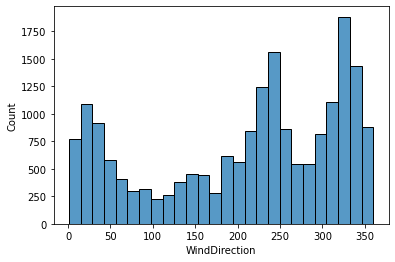

In [14]:
sns.histplot(data=df, x='WindDirection') # Distribution of most common wind directions

In [15]:
df['DateTime']

0       2019-02-16 09:00:00
1       2019-02-16 10:00:00
2       2019-02-16 11:00:00
3       2019-02-16 12:00:00
4       2019-02-16 13:00:00
                ...        
19300   2021-05-22 02:00:00
19301   2021-05-22 03:00:00
19302   2021-05-22 04:00:00
19303   2021-05-22 05:00:00
19304   2021-05-22 06:00:00
Name: DateTime, Length: 19305, dtype: datetime64[ns]

**Step 2 - Loop for loading all data station in one single DataFrame**

In [16]:
path = 'Data/StationsRecords/'
csvs= ['DH-4554X.csv', 'DH-6001.csv', 'DH-6329X.csv']

In [17]:
# Loop for uploading all csv station files in one single DataFrame


stations = pd.DataFrame() # reset of df
for i in csvs: #
    df = pd.read_csv(path + i, sep = ';',
                     header = None,
                     usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32])
    stations = pd.concat([stations,df],axis = 0)
            


In [18]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

stations.rename(columns=colnames, inplace=True)

In [19]:
stations['StationName'].value_counts() # Fast check if we properly upload all the registers

CABO DE GATA  FARO    19592
CARTAYA   PEMARES     19305
TARIFA                19110
Name: StationName, dtype: int64

In [20]:
# wind measurements from m/s to knots 
stations.Wind = stations.Wind * 1.9438
stations.WindMax = stations.WindMax * 1.9438 

# Data Station Actuals DataFrame #

We are going to fetch wind meassurements at Weather Stations (Wind, Wind Gust, Wind direction) that will be the target variables to be determined with the features in the historicalweather dataset. The granularity at historical weather dataset is 3h so we are going to use the same in the actal wind dataset. 

***In the first iteration we re going to collect just actual wind data(target) and just for the targeting location(tarifa, SPAIN, lon = -5.59883, lat=36.013985  ), but might consider collect other climatic actuals that can be interesting to understand when big gaps between the forecast and the actuals happens***

In [3]:
weatherStation_tarifa = pd.read_csv('Data/StationsRecords/DH-6001.csv', sep = ';',
                 header = None,
                 usecols=[5, 11,10,14]
                )

In [4]:
colnames = {5:'DateTime',
            11:'Tarifa_Wind',
            10:'Tarifa_WindGust',
            14:'Tarifa_WindDirection',
            }

weatherStation_tarifa.rename(columns=colnames, inplace=True)

We are going to adapt the granularity of Actuals to Historical Forecast. Then we are going to use the mean values of wind, gust and direction. Direction of wind is given in degrees so it has to be taken into account that 360º and 0º are the same angle (N) 

In [5]:
weatherStation_tarifa.head(10)

,DateTime,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection
0,2019-02-16T09:00:00,18.9,9.0,72.0
1,2019-02-16T10:00:00,17.8,8.5,78.0
2,2019-02-16T11:00:00,17.5,9.7,89.0
3,2019-02-16T12:00:00,17.0,10.4,86.0
4,2019-02-16T13:00:00,18.7,11.1,83.0
5,2019-02-16T14:00:00,18.4,12.2,84.0
6,2019-02-16T15:00:00,18.9,10.9,82.0
7,2019-02-16T16:00:00,18.0,10.7,85.0
8,2019-02-16T17:00:00,16.9,10.1,83.0
9,2019-02-16T18:00:00,18.4,12.0,87.0


In [10]:
weatherStation_tarifa.isna().sum()

DateTime                 0
Tarifa_WindGust         96
Tarifa_Wind             63
Tarifa_WindDirection    55
dtype: int64

 - **Step 1 -** mean values for Wind and Wind Gust every 3 hours (granularity)

In [42]:
for i in range(0,len (weatherStation_tarifa)):
    if weatherStation_tarifa['DateTime'][i].find("T00:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T03:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T06:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T09:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T12:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T15:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T18:00:00")!= -1 or \
        weatherStation_tarifa['DateTime'][i].find("T21:00:00")!= -1:
        
        weatherStation_tarifa.loc[i,'Tarifa_Wind']=weatherStation_tarifa.loc[i:i+2,'Tarifa_Wind'].mean()
        weatherStation_tarifa.loc[i,'Tarifa_WindGust']=weatherStation_tarifa.loc[i:i+2,'Tarifa_WindGust'].mean()
    else:
        weatherStation_tarifa.drop(i, axis=0, inplace=True)
        
weatherStation_tarifa.head(10)

,DateTime,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection
0,2019-02-16T09:00:00,18.066667,9.066667,72.0
3,2019-02-16T12:00:00,18.033333,11.233333,86.0
6,2019-02-16T15:00:00,17.933333,10.566667,82.0
9,2019-02-16T18:00:00,18.400000,12.000000,87.0
12,2019-02-16T21:00:00,NaN,NaN,83.0
15,2019-02-17T00:00:00,NaN,NaN,86.0
18,2019-02-17T03:00:00,NaN,NaN,85.0
21,2019-02-17T06:00:00,NaN,NaN,82.0
24,2019-02-17T09:00:00,NaN,NaN,27.0
27,2019-02-17T12:00:00,NaN,NaN,284.0


In [49]:
weatherStation_tarifa

,DateTime,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection
0,2019-02-16T09:00:00,18.066667,9.066667,72.0
3,2019-02-16T12:00:00,18.033333,11.233333,86.0
6,2019-02-16T15:00:00,17.933333,10.566667,82.0
9,2019-02-16T18:00:00,18.400000,12.000000,87.0
12,2019-02-16T21:00:00,NaN,NaN,83.0
...,...,...,...,...
19087,2021-05-21T09:00:00,13.766667,8.733333,80.0
19090,2021-05-21T12:00:00,11.633333,7.933333,80.0
19093,2021-05-21T15:00:00,8.800000,3.966667,87.0
19096,2021-05-21T18:00:00,4.433333,2.500000,270.0


- **Step 2 Wind direction** To treat the wind direction we are going to descompose wind angle degree into two components, N-S and E-W , in order to avoid that 359 º and 1 º angles mean will no be considered as the same direction (North). (This could be feature engineering )

In [ ]:
weatherStation_tarifa['Tarifa_Direction N-S']=np.cos(np.radians(weatherStation_tarifa['Tarifa_WindDirection']))
weatherStation_tarifa['Tarifa_Direction E-W']=np.sin(np.radians(weatherStation_tarifa['Tarifa_WindDirection']))

# If we want to do the way-back conversion from N-S E-W components to degrees we would use this formula:
# np.degrees(np.arctan({Direction N-S}/ {Direction E-W})

In [ ]:
weatherStation_tarifa

- **Step 3** Finally we are going to add **compass rose** components for easier visualization and categorization when needed

In [ ]:
# Auxiliar dataframe for categorizing wind direcitons for easier visualizaiton later on. 

aux_windDirection=pd.DataFrame()
aux_windDirection['Direction']= ('N','NNE', 'NE','NEE','E','SEE','SE','SSE','S','SSW','SW','SWW','W','WNW','NW','NNW')
aux_windDirection['AngleFrom']= (348.75,11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25)
aux_windDirection['AngleTo']= (11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25,348.75 )
aux_windDirection.head(10)

In [ ]:
weatherStation_tarifa['Tarifa Compass']=0

In [ ]:
for i in range (0,len(weatherStation_tarifa)):
    x = weatherStation_tarifa.loc[i,'Tarifa_WindDirection']            
    for j in range(0,len(aux_windDirection)):
        if x >= aux_windDirection['AngleFrom'][j] and x <aux_windDirection['AngleTo'][j]:
            weatherStation_tarifa.loc[i,'Tarifa Compass'] = aux_windDirection['Direction'][j]
        elif x >= aux_windDirection['AngleFrom'][0] or x<aux_windDirection['AngleTo'][0]:
            weatherStation_tarifa.loc[i,'Tarifa Compass'] = aux_windDirection['Direction'][0]
            break


In [2]:
weatherStation_tarifa.tail(10)

NameError: name 'weatherStation_tarifa' is not defined

# Cleaning Historical Forecast Data #

**Step 1 - Data set exploring**

In [11]:
# We are going to see how it looks like.
# It is a very big dataset that would require a big computing time if open completely so were going to  just open few rows to inspect.

historicalForecast = pd.read_csv('Data/historicalForecast.csv', nrows = 1000)


In [12]:
pd.set_option('display.max_rows', 100)
historicalForecast.head(100)

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,1507507200,2017-10-09 00:00:00 +0000 UTC,1507507200,2017-10-09 00:00:00 +0000 UTC,36.013158,-5.598892,19.67,19.00,1018.448,1017.336,...,80.801,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
1,1507507200,2017-10-09 00:00:00 +0000 UTC,1507518000,2017-10-09 03:00:00 +0000 UTC,36.013158,-5.598892,19.54,18.75,1017.801,1016.569,...,86.763,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
2,1507507200,2017-10-09 00:00:00 +0000 UTC,1507528800,2017-10-09 06:00:00 +0000 UTC,36.013158,-5.598892,19.44,18.55,1017.759,1016.405,...,92.252,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
3,1507507200,2017-10-09 00:00:00 +0000 UTC,1507539600,2017-10-09 09:00:00 +0000 UTC,36.013158,-5.598892,20.39,18.48,1018.645,1017.271,...,90.164,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
4,1507507200,2017-10-09 00:00:00 +0000 UTC,1507550400,2017-10-09 12:00:00 +0000 UTC,36.013158,-5.598892,22.26,17.87,1018.389,1017.104,...,100.970,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
5,1507507200,2017-10-09 00:00:00 +0000 UTC,1507561200,2017-10-09 15:00:00 +0000 UTC,36.013158,-5.598892,22.64,17.50,1016.735,1015.625,...,105.883,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
6,1507507200,2017-10-09 00:00:00 +0000 UTC,1507572000,2017-10-09 18:00:00 +0000 UTC,36.013158,-5.598892,21.22,18.02,1016.837,1015.876,...,88.460,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
7,1507507200,2017-10-09 00:00:00 +0000 UTC,1507582800,2017-10-09 21:00:00 +0000 UTC,36.013158,-5.598892,20.37,17.95,1018.153,1017.209,...,76.054,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
8,1507507200,2017-10-09 00:00:00 +0000 UTC,1507593600,2017-10-10 00:00:00 +0000 UTC,36.013158,-5.598892,20.22,18.25,1017.759,1016.731,...,78.312,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
9,1507507200,2017-10-09 00:00:00 +0000 UTC,1507604400,2017-10-10 03:00:00 +0000 UTC,36.013158,-5.598892,20.10,18.51,1017.118,1016.065,...,75.937,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0


In [13]:
# We have two dates in each row: 
# 1- forecast dt(when the forecast was made)
# 2- slice dt (date for witch the forecast was made)
# We re going to check how many slice dt are predicted in each forecast dt:

historicalForecast[historicalForecast['forecast dt unixtime']==1507528800]


,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
93,1507528800,2017-10-09 06:00:00 +0000 UTC,1507528800,2017-10-09 06:00:00 +0000 UTC,36.013158,-5.598892,19.08,18.69,1018.254,1016.961,...,86.089,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
94,1507528800,2017-10-09 06:00:00 +0000 UTC,1507539600,2017-10-09 09:00:00 +0000 UTC,36.013158,-5.598892,19.89,18.37,1018.995,1017.666,...,95.723,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
95,1507528800,2017-10-09 06:00:00 +0000 UTC,1507550400,2017-10-09 12:00:00 +0000 UTC,36.013158,-5.598892,22.00,17.75,1018.687,1017.405,...,101.619,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
96,1507528800,2017-10-09 06:00:00 +0000 UTC,1507561200,2017-10-09 15:00:00 +0000 UTC,36.013158,-5.598892,22.72,17.21,1017.124,1015.895,...,110.015,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
97,1507528800,2017-10-09 06:00:00 +0000 UTC,1507572000,2017-10-09 18:00:00 +0000 UTC,36.013158,-5.598892,21.32,17.74,1017.128,1016.073,...,88.878,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
98,1507528800,2017-10-09 06:00:00 +0000 UTC,1507582800,2017-10-09 21:00:00 +0000 UTC,36.013158,-5.598892,20.24,17.75,1018.324,1017.377,...,75.055,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
99,1507528800,2017-10-09 06:00:00 +0000 UTC,1507593600,2017-10-10 00:00:00 +0000 UTC,36.013158,-5.598892,20.08,17.95,1018.088,1017.022,...,79.671,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
100,1507528800,2017-10-09 06:00:00 +0000 UTC,1507604400,2017-10-10 03:00:00 +0000 UTC,36.013158,-5.598892,19.97,18.35,1017.293,1016.358,...,74.100,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
101,1507528800,2017-10-09 06:00:00 +0000 UTC,1507615200,2017-10-10 06:00:00 +0000 UTC,36.013158,-5.598892,19.94,18.45,1017.453,1016.446,...,82.560,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
102,1507528800,2017-10-09 06:00:00 +0000 UTC,1507626000,2017-10-10 09:00:00 +0000 UTC,36.013158,-5.598892,20.77,18.35,1018.642,1017.715,...,87.570,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0


In [24]:
# ... so for each forecast dt, we have 93 silce dt predictions starting in 3 hours intervals and finishing in 12 h intervals.
# Let see now what is the frequency of forecast dt (how often a new forecast is provided):


historicalForecast['forecast dt iso'].value_counts()


2017-10-10 12:00:00 +0000 UTC    93
2017-10-09 00:00:00 +0000 UTC    93
2017-10-09 12:00:00 +0000 UTC    93
2017-10-10 00:00:00 +0000 UTC    93
2017-10-11 00:00:00 +0000 UTC    93
2017-10-10 06:00:00 +0000 UTC    93
2017-10-09 06:00:00 +0000 UTC    93
2017-10-11 06:00:00 +0000 UTC    93
2017-10-10 18:00:00 +0000 UTC    93
2017-10-09 18:00:00 +0000 UTC    93
2017-10-11 12:00:00 +0000 UTC    70
Name: forecast dt iso, dtype: int64

 ... so we can see there are 4 predictions dayly (by 00.00, 06.00, 12.00, 18.00). That means for an specific datetime there will 93 different predictions, that will be updated each 6 hours. Obviously, the more recent the forecast the more accurate it will be. 

For the purpose of this project and in order to simplify the data, we are going to maintain just one forecast for each "slice dt". The forecast selected will be the one made in the same day at 00.00 h that should be very accurate. 

The goal of the project however will be to improve such accuracy, training a model with the forecast data as features and the station actual data as targets (what is a challeging objective !!)

*Summurazing,* ***for each day, the forecast made by 00.00 hour will be kept as a prediction for the next 24 hours. The prediction interval for slice dt prediction for the first 24 hours is 3 hours, so we will maintain (24h/3h) 8 slice dt per forecast***

*Additionally* ***we are going to kept just forecast from 6th of Feb 2019, that is the first record available at DataStations Datasets.***

The strategy would be:

- **Step 1** - Create a dataset with forecast dt from 2019-02-06 and on
- **Step 2** - From the previous intermediate dataset, keep just the first 8 slice dt (24h) from each forecast dt

In [14]:
pd.set_option('display.max_rows', 10)

**Step 1** - Create a dataset with forecast dt from 2019-02-06 and on

In [15]:
df_chunk = pd.read_csv('Data/historicalForecast.csv', chunksize=10000)

chunk_list = []

for chunk in df_chunk:
    chunk_list.append(chunk)

    
historicalForecast = pd.concat(chunk_list)

In [16]:
historicalForecast.shape

(591054, 23)

In [17]:
resultado = historicalForecast['forecast dt iso'].str.find('2019-02-06 00:00:00 +0000 UTC')

In [18]:
resultado[resultado == 0] # the first row where '2019-02-06 00:00:00 +0000 UTC' appear is row 180420

180420    0
180421    0
180422    0
180423    0
180424    0
         ..
180508    0
180509    0
180510    0
180511    0
180512    0
Name: forecast dt iso, Length: 93, dtype: int64

In [19]:
historicalForecast = historicalForecast[historicalForecast.index>=180420]

In [20]:
historicalForecast

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
180420,1549411200,2019-02-06 00:00:00 +0000 UTC,1549411200,2019-02-06 00:00:00 +0000 UTC,36.013158,-5.598892,13.04,8.45,1026.729,1024.826,...,86.282,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
180421,1549411200,2019-02-06 00:00:00 +0000 UTC,1549422000,2019-02-06 03:00:00 +0000 UTC,36.013158,-5.598892,12.76,7.48,1025.669,1023.900,...,75.530,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,3.0,0.0
180422,1549411200,2019-02-06 00:00:00 +0000 UTC,1549432800,2019-02-06 06:00:00 +0000 UTC,36.013158,-5.598892,12.64,7.45,1025.405,1023.779,...,79.382,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,6.0,0.0
180423,1549411200,2019-02-06 00:00:00 +0000 UTC,1549443600,2019-02-06 09:00:00 +0000 UTC,36.013158,-5.598892,12.99,8.35,1025.893,1024.346,...,78.754,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,3.0,0.0
180424,1549411200,2019-02-06 00:00:00 +0000 UTC,1549454400,2019-02-06 12:00:00 +0000 UTC,36.013158,-5.598892,14.66,8.65,1025.893,1024.496,...,90.561,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591049,1621447200,2021-05-19 18:00:00 +0000 UTC,1622786400,2021-06-04 06:00:00 +0000 UTC,36.013158,-5.598892,17.80,15.58,1015.080,1002.681,...,245.166,0.0,0.0,0.0,0.0,15.625,0,0.0,6.0,0.0
591050,1621447200,2021-05-19 18:00:00 +0000 UTC,1622797200,2021-06-04 09:00:00 +0000 UTC,36.013158,-5.598892,19.66,15.36,1015.997,1003.615,...,257.380,0.0,0.0,0.0,0.0,15.625,0,0.0,3.0,0.0
591051,1621447200,2021-05-19 18:00:00 +0000 UTC,1622808000,2021-06-04 12:00:00 +0000 UTC,36.013158,-5.598892,20.85,15.54,1016.376,1004.008,...,271.521,0.0,0.0,0.0,0.0,15.625,0,0.0,6.0,0.0
591052,1621447200,2021-05-19 18:00:00 +0000 UTC,1622818800,2021-06-04 15:00:00 +0000 UTC,36.013158,-5.598892,20.62,15.06,1015.688,1003.335,...,267.430,0.0,0.0,0.0,0.0,15.625,0,0.0,3.0,0.0


In [21]:
historicalForecast.reset_index(drop=True, inplace=True)

In [22]:
historicalForecast

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,1549411200,2019-02-06 00:00:00 +0000 UTC,1549411200,2019-02-06 00:00:00 +0000 UTC,36.013158,-5.598892,13.04,8.45,1026.729,1024.826,...,86.282,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
1,1549411200,2019-02-06 00:00:00 +0000 UTC,1549422000,2019-02-06 03:00:00 +0000 UTC,36.013158,-5.598892,12.76,7.48,1025.669,1023.900,...,75.530,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,3.0,0.0
2,1549411200,2019-02-06 00:00:00 +0000 UTC,1549432800,2019-02-06 06:00:00 +0000 UTC,36.013158,-5.598892,12.64,7.45,1025.405,1023.779,...,79.382,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,6.0,0.0
3,1549411200,2019-02-06 00:00:00 +0000 UTC,1549443600,2019-02-06 09:00:00 +0000 UTC,36.013158,-5.598892,12.99,8.35,1025.893,1024.346,...,78.754,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,3.0,0.0
4,1549411200,2019-02-06 00:00:00 +0000 UTC,1549454400,2019-02-06 12:00:00 +0000 UTC,36.013158,-5.598892,14.66,8.65,1025.893,1024.496,...,90.561,0.0,0.0,0.0,0.0,0.000,999900026055400900000,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410629,1621447200,2021-05-19 18:00:00 +0000 UTC,1622786400,2021-06-04 06:00:00 +0000 UTC,36.013158,-5.598892,17.80,15.58,1015.080,1002.681,...,245.166,0.0,0.0,0.0,0.0,15.625,0,0.0,6.0,0.0
410630,1621447200,2021-05-19 18:00:00 +0000 UTC,1622797200,2021-06-04 09:00:00 +0000 UTC,36.013158,-5.598892,19.66,15.36,1015.997,1003.615,...,257.380,0.0,0.0,0.0,0.0,15.625,0,0.0,3.0,0.0
410631,1621447200,2021-05-19 18:00:00 +0000 UTC,1622808000,2021-06-04 12:00:00 +0000 UTC,36.013158,-5.598892,20.85,15.54,1016.376,1004.008,...,271.521,0.0,0.0,0.0,0.0,15.625,0,0.0,6.0,0.0
410632,1621447200,2021-05-19 18:00:00 +0000 UTC,1622818800,2021-06-04 15:00:00 +0000 UTC,36.013158,-5.598892,20.62,15.06,1015.688,1003.335,...,267.430,0.0,0.0,0.0,0.0,15.625,0,0.0,3.0,0.0


**Step 2** - From the previous intermediate dataset, keep just the first 8 slice dt (24h) from each forecast dt

In [23]:
pd.set_option('display.max_rows', 10)

In [24]:
aux1 = historicalForecast.iloc[0:8,:]

for i in range (9,len(historicalForecast)):
    if str(historicalForecast['forecast dt iso'][i]).find('00:00:00')!=-1 \
    and historicalForecast['forecast dt iso'][i] == historicalForecast['slice dt iso'][i] :
        aux2 = historicalForecast.iloc[i:i+8,:]
        aux1 = pd.concat([aux1,aux2])
historicalForecast = aux1

In [25]:
historicalForecast.head(10) # Check if we are keeping just forecast given by 00.00 and for the next 24 h.

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,...,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,1549411200,2019-02-06 00:00:00 +0000 UTC,1549411200,2019-02-06 00:00:00 +0000 UTC,36.013158,-5.598892,13.04,8.45,1026.729,1024.826,...,86.282,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
1,1549411200,2019-02-06 00:00:00 +0000 UTC,1549422000,2019-02-06 03:00:00 +0000 UTC,36.013158,-5.598892,12.76,7.48,1025.669,1023.900,...,75.530,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,3.0,0.0
2,1549411200,2019-02-06 00:00:00 +0000 UTC,1549432800,2019-02-06 06:00:00 +0000 UTC,36.013158,-5.598892,12.64,7.45,1025.405,1023.779,...,79.382,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,6.0,0.0
3,1549411200,2019-02-06 00:00:00 +0000 UTC,1549443600,2019-02-06 09:00:00 +0000 UTC,36.013158,-5.598892,12.99,8.35,1025.893,1024.346,...,78.754,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,3.0,0.0
4,1549411200,2019-02-06 00:00:00 +0000 UTC,1549454400,2019-02-06 12:00:00 +0000 UTC,36.013158,-5.598892,14.66,8.65,1025.893,1024.496,...,90.561,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,6.0,0.0
5,1549411200,2019-02-06 00:00:00 +0000 UTC,1549465200,2019-02-06 15:00:00 +0000 UTC,36.013158,-5.598892,15.27,8.74,1024.338,1022.910,...,101.839,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,3.0,0.0
6,1549411200,2019-02-06 00:00:00 +0000 UTC,1549476000,2019-02-06 18:00:00 +0000 UTC,36.013158,-5.598892,14.20,8.66,1023.838,1022.307,...,122.088,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,6.0,0.0
7,1549411200,2019-02-06 00:00:00 +0000 UTC,1549486800,2019-02-06 21:00:00 +0000 UTC,36.013158,-5.598892,13.50,9.25,1024.810,1023.211,...,78.440,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,3.0,0.0
372,1549497600,2019-02-07 00:00:00 +0000 UTC,1549497600,2019-02-07 00:00:00 +0000 UTC,36.013158,-5.598892,13.26,8.51,1024.518,1022.679,...,281.117,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
373,1549497600,2019-02-07 00:00:00 +0000 UTC,1549508400,2019-02-07 03:00:00 +0000 UTC,36.013158,-5.598892,12.93,8.13,1023.804,1021.913,...,272.671,0.0,0.0,0.0,0.0,0.0,999900026055400900000,0.0,3.0,0.0


In [26]:
pd.set_option('display.max_rows', 30)
historicalForecast.

0.000    6513
0.001      26
0.002       2
Name: rate, dtype: int64

In [28]:
historicalForecast.columns

Index(['forecast dt unixtime', 'forecast dt iso', 'slice dt unixtime',
       'slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'ground_pressure', 'humidity', 'clouds', 'wind_speed', 'wind_deg',
       'rain', 'snow', 'ice', 'fr_rain', 'convective', 'snow_depth',
       'accumulated', 'hours', 'rate'],
      dtype='object')

- ** Step 3 ** Fill NaN Have different types. 
Columns to be fill na s with linear interpolation:
temperature, 